# Import software libraries

In [1]:
import sys                                             # Read system parameters.
import os                                              # Interact with the operating system.
import numpy as np                                     # Work with multi-dimensional arrays and matrices.
import pandas as pd                                    # Manipulate and analyze data.
import matplotlib                                      # Create 2D charts.
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import folium                                          # Plot values on a map.
import yellowbrick                                     # Visualize elbow and silhouette plots.
import sklearn                                         # Perform data mining and analysis.
from time import time                                  # Calculate training time.

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- Folium {}'.format(folium.__version__))
print('- Yellowbrick {}'.format(yellowbrick.__version__))
print('- scikit-learn {}\n'.format(sklearn.__version__))

Libraries used in this project:
- Python 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
[GCC 7.3.0]
- NumPy 1.16.2
- pandas 0.24.2
- Matplotlib 3.0.3
- Folium 0.10.0
- Yellowbrick 1.0.post1
- scikit-learn 0.20.3



# Load the dataset

In [2]:
PROJECT_ROOT_DIR = '.'
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, 'housing_data')
print('Data files in this project:', os.listdir(DATA_PATH) )

# Read the raw dataset.
housing_data_file = os.path.join( DATA_PATH, 'kc_house_data.csv' )
housing_data = pd.read_csv( housing_data_file )
print('Loaded {} records from {}.\n'.format(len(housing_data), housing_data_file))
print(f'Dataset Rows and Columns: {housing_data.shape}')

# Preview first 5 records in the dataset.
housing_data.head(5)

Data files in this project: ['kc_house_data.csv']
Loaded 21613 records from ./housing_data/kc_house_data.csv.

Dataset Rows and Columns: (21613, 21)


id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

# Engineer features as needed

In [3]:
# Create a price per square foot feature based on 'price' and 'sqft_living'.
housing_data['price_per_sqft'] = housing_data['price'] / housing_data['sqft_living']
housing_data.head(5)

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...        1180              0   
1      7242     2.0           0     0  ...        2170            400   
2     10000     1.0           0     0  ...         770              0   
3      5000     1.0           0     0  ...        1050            910   
4      8080     1.0           0     0  ...        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  price_per_sqft  
0        5650      188.050847  
1        7639      209.338521  
2        8062      233.766234  
3        5000      308.163265  
4        7503      303.571429  

[5 rows x 22 columns]

# Use a *k*-means model to label every row in the dataset

In [4]:
from sklearn.cluster import KMeans

# Produce cluster labels.
def get_cluster_labels(cluster_count, X):
    
    kmeans = KMeans(n_clusters = cluster_count,
                    init = 'k-means++',
                    random_state = 42)
    
    kmeans.fit(X)
    cluster_labels = kmeans.predict(X)
    
    # Return the original DataFrame with the labels appended as a new column.
    return cluster_labels

print('The function to produce cluster labels using a k-means model has been defined.')

The function to produce cluster labels using a k-means model has been defined.


# Generate the cluster labels and attach them to the original dataset

In [5]:
# Initially cluster by latitude and longitude, just to verify we're using k-means model correctly.
feature_set_1 = ['lat', 'long']
X = housing_data[feature_set_1]

# Generate cluster labels for the housing data, assuming 4 clusters.
cluster_labels = get_cluster_labels(4, X)

# Append the cluster labels to a new column in the original dataset.
labeled_houses = housing_data.assign(c_label = cluster_labels)

# Show a preview of rows in the dataset with cluster labels added.
labeled_houses.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
0      5650     1.0           0     0  ...              0      1955   
1      7242     2.0           0     0  ...            400      1951   
2     10000     1.0           0     0  ...              0      1933   
3      5000     1.0           0     0  ...            910      1965   
4      8080     1.0           0     0  ...              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0             0    98178  47.5112 -122.257           1340        5650   
1          1991    98125  47.7210 -122.319           1690        7639   
2             0    98028  47.7379 -122.233           2720        8062   
3             0    98136  47.5208 -122.393           1360        5000   
4             0    98074  47.6168 -122.045           1800        7503   

   price_per_sqft  c_label  
0      188.050847        1  
1      209.338521        3  
2      233.766234        3  
3      308.163265        1  
4      303.571429        2  

[5 rows x 23 columns]

# Observe how many houses were distributed to each cluster

In [6]:
for i in range(4):
    num_in_clust = len(labeled_houses[labeled_houses['c_label'] == i])
    print('Number of houses in cluster {} = {}'.format(i, num_in_clust))

Number of houses in cluster 0 = 4273
Number of houses in cluster 1 = 5104
Number of houses in cluster 2 = 4810
Number of houses in cluster 3 = 7426


# Show clusters of homes on the map by location

In [7]:
from folium.plugins import HeatMap

def show_on_map(labeled_house_dataset, map_title):
    
    # To avoid overwhelming the visualization tool, we'll only plot every nth house.
    n_homes = 20
    mapping_set = labeled_house_dataset.sort_values(by = ['price'], ascending = False)[::n_homes]

    # Descriptions of the building grades used in King County.
    bldg_grades = ['Unknown', 'Cabin', 'Substandard', 'Poor', 'Low', 'Fair',
                   'Low Average', 'Average', 'Good', 'Better',
                   'Very Good', 'Excellent', 'Luxury', 'Mansion', 'Exceptional Properties']

    # Generate the base map, centering on King County.
    base_map = folium.Map(location = [47.5300, -122.2000],
                          control_scale = True, 
                          max_zoom = 20,
                          zoom_start = 10,
                          zoom_control = True)

    # Get price of most expensive house.
    max_price = labeled_house_dataset.loc[labeled_house_dataset['price'].idxmax()]['price']

    # Plot homes by price.
    for index, row in mapping_set.iterrows():

        # Add popup text. Click each point to show details.
        popup_text = '<br>'.join(['King&nbsp;County&nbsp;Housing&nbsp;Sales&nbsp;Data',
                                  'Price:&nbsp;${:,.0f}',
                                  'Cluster:&nbsp;{:.0f}',
                                  'Bedrooms:&nbsp;{:.0f}',
                                  'Bathrooms:&nbsp;{:.0f}',
                                  'Sqft&nbsp;Living:&nbsp;{:,.0f}',
                                  'Location:&nbsp;[{:.3f},{:.3f}]'])

        popup_text = popup_text.format(row['price'],
                                       row['c_label'],
                                       row['bedrooms'],
                                       row['bathrooms'],
                                       row['sqft_living'],
                                       row['lat'],
                                       row['long'])

        cluster_value = int(row['c_label'])
        scaling_value = (row['price'] / max_price)      # 1.0 for highest price.

        folium.CircleMarker([row['lat'], row['long']],
                            radius = 25 * scaling_value,
                            weight = 3,
                            fill = True,
                            fill_color = '#000000',
                            color = '#0000FF',
                            fill_opacity = 0.8,
                            opacity = 0.8,
                            popup = popup_text).add_to(base_map)
        
    # Heat map around each cluster.
    cluster_max = labeled_house_dataset.loc[labeled_house_dataset['c_label'].idxmax()]['c_label'] + 1
    
    for cluster_num in range(0, cluster_max):
        
        houses_in_same_cluster = labeled_house_dataset.loc[labeled_house_dataset['c_label'] == cluster_num]
        house_locations = houses_in_same_cluster[['lat', 'long']].copy()
        
        mean_price = houses_in_same_cluster['price_per_sqft'].mean()
        
        cluster_name = f'Cluster {cluster_num} (mean ${mean_price:,.0f} per sqft)'
        feature_group = folium.FeatureGroup(name = cluster_name)
        feature_group.add_child(HeatMap(house_locations, radius = 10))
        base_map.add_child(feature_group)
        
    folium.map.LayerControl('bottomright', collapsed = False).add_to(base_map)
    
    # Add title to map.
    map_html = f'<div style="position:fixed; top:10px; left:60px; z-index:9999"><b>{map_title}</b></div>'
    base_map.get_root().html.add_child(folium.Element(map_html))

    return base_map

print('The function to show the map has been defined.')

The function to show the map has been defined.


In [8]:
# View the results on the map.
show_on_map(labeled_houses, 'Houses clustered by location')

# Cluster by price per square foot

In [9]:
# Cluster homes by the price per square foot.
feature_set_2 = ['price_per_sqft']
X = housing_data[feature_set_2]

# Generate cluster labels for the housing data, assuming 4 clusters.
cluster_labels = get_cluster_labels(4, X)

# Append the cluster labels to a new column in the original dataset.
labeled_houses = housing_data.assign(c_label = cluster_labels)

# Show on the map.
show_on_map(labeled_houses, 'Houses clustered by price per square foot')

# Prepare to cluster by multiple features of interest to customers

In [10]:
# Specify the new dataset.
final_feature_set = ['sqft_living', 'bathrooms', 'bedrooms', 'grade', 'view', 'waterfront']        
X = housing_data[final_feature_set] 

print('A dataset containing features of interest to customers has been defined.')

A dataset containing features of interest to customers has been defined.


# Use the elbow method to determine the optimal number of clusters

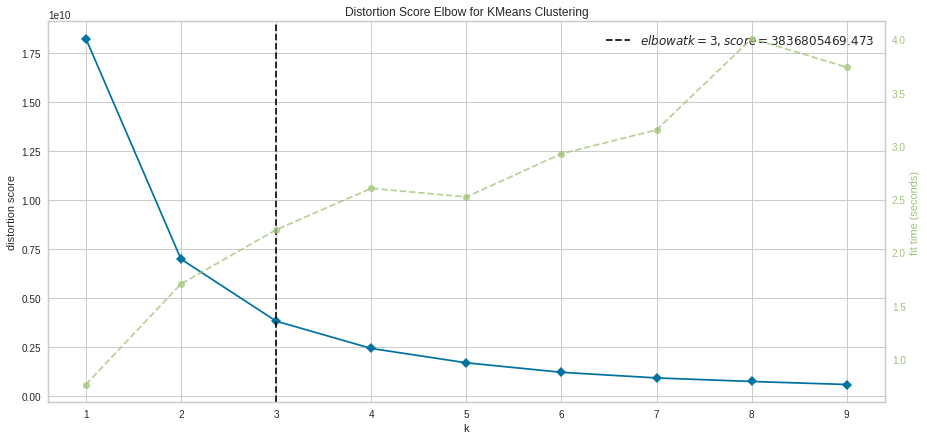

In [11]:
from yellowbrick.cluster import KElbowVisualizer

# Use the elbow method to find the optimal number of clusters.
plt.rcParams["figure.figsize"] = (15, 7)

visualizer = KElbowVisualizer(KMeans(init = 'k-means++', random_state = 42), k = (1, 10))
visualizer.fit(X)
visualizer.poof();

# Use silhouette analysis to determine the optimal number of clusters

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

# The number of clusters to try out.
range_n_clusters = [2, 3, 4, 5]

high_score = 0
optimum_n_clusters = 0

for n in range_n_clusters:
        
    # Create k-means model and generate labels from the dataset.
    kmeans = KMeans(n_clusters = n, random_state = 10)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    print('\nWith {} clusters:'.format(n))
    print('   - Average silhouette score:', silhouette_avg)
    
    # Note the high score.
    if silhouette_avg > high_score:
        high_score = silhouette_avg
        optimum_n_clusters = n

    # Compute the silhouette scores for each sample.
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    # Prepare to plot charts side by side.
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(17, 5)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n + 1) * 10])
    y_lower = 10
    
    # LEFT SIDE: SILHOUETTE PLOTS
    for i in range(n):
        
        # Plot silhouette for one cluster at a time.
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0,
                          ith_cluster_silhouette_values,
                          facecolor = color,
                          edgecolor = color,
                          alpha = 1)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # Use 10 for the 0 samples.
        
        # Log how many values were in this cluster.
        print('   - Cluster {} includes {} values.'.format(i, size_cluster_i))

    ax1.set_title('Silhouette Plots')
    ax1.set_xlabel('Silhouette Coefficient Values')
    ax1.set_ylabel('Cluster Label')
    ax1.axvline(x = silhouette_avg, color = 'red', linestyle = '--')
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # RIGHT SIDE: SCATTER PLOTS
    
    # Caption the various clusters.
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n)
    centers = kmeans.cluster_centers_
    
    # Plot the first two features.
    ax2.scatter(X['sqft_living'],
                X['bathrooms'], 
                marker = 'o', 
                alpha = 0.7, 
                s = 50,
                color = colors,
                edgecolor = 'black');
    
    # Show a box at the center of each cluster, with the cluster number inside it.
    ax2.scatter(centers[:, 0],centers[:, 1],marker = 's', c = 'white', alpha = 1.0, s = 200, edgecolor = 'black')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker = '$%d$' % i, alpha = 1.0, s = 50, edgecolor = 'black')
        
    # Axis labels.
    ax2.set_title('Clustered Data')
    ax2.set_xlabel(X.columns[0])
    ax2.set_ylabel(X.columns[1])
    plt.suptitle(('Number of clusters = %d' % n), fontsize = 16, fontweight = 'bold')

plt.show()

print('The highest score ({}) was obtained using {} centers.'.format(high_score, optimum_n_clusters))


With 2 clusters:
   - Average silhouette score: 0.5956028486082886
   - Cluster 0 includes 15029 values.
   - Cluster 1 includes 6584 values.

With 3 clusters:
   - Average silhouette score: 0.55921974259051
   - Cluster 0 includes 10918 values.
   - Cluster 1 includes 8374 values.
   - Cluster 2 includes 2321 values.

With 4 clusters:
   - Average silhouette score: 0.5414443565247314
   - Cluster 0 includes 7882 values.
   - Cluster 1 includes 4552 values.
   - Cluster 2 includes 1067 values.
   - Cluster 3 includes 8112 values.

With 5 clusters:
   - Average silhouette score: 0.5321936319368658


# Use the optimal number of clusters to show the house groups

In [ ]:
# Generate cluster labels for the housing data based on the optimal number of clusters.
cluster_labels = get_cluster_labels(optimum_n_clusters, X)

# Append the cluster labels to a new column in the original dataset.
labeled_houses = housing_data.assign(c_label = cluster_labels)

# Show on the map
show_on_map(labeled_houses, 'Houses clustered by size, grade, view, waterfront')